In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [2]:
df = pd.read_csv('./Data/GBIMEfinal.csv')

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df['t'] = pd.to_datetime(df['t']).dt.date
df = df.set_index('t')
df = df[['c']].copy()
df

,c
t,
2012-09-09,46.052427
2012-09-10,50.526092
2012-09-11,55.526070
2012-09-12,61.052361
2012-09-13,67.104966
...,...
2023-05-07,183.000000
2023-05-08,181.500000
2023-05-09,183.200000


<Axes: xlabel='t'>

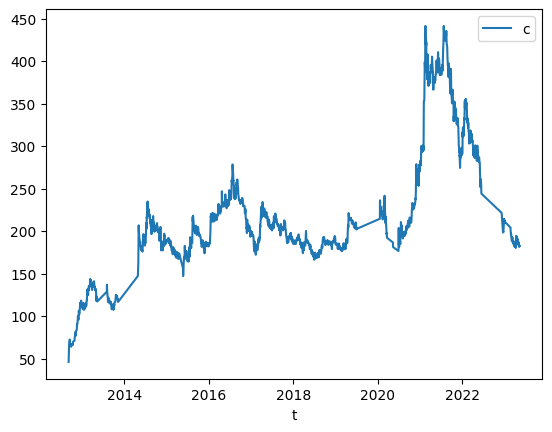

In [4]:
df.plot()

In [5]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [6]:
test_result=adfuller(df['c'])

In [7]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(c):
    result=adfuller(c)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [8]:
adfuller_test(df['c'])

ADF Test Statistic : -2.291983140502449
p-value : 0.17456660617484832
#Lags Used : 14
Number of Observations Used : 1982
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [9]:
#differencing
df['c First Difference'] = df['c'] - df['c'].shift(1)

In [10]:
df['c'].shift(1)

t
2012-09-09           NaN
2012-09-10     46.052427
2012-09-11     50.526092
2012-09-12     55.526070
2012-09-13     61.052361
                 ...    
2023-05-07    186.300000
2023-05-08    183.000000
2023-05-09    181.500000
2023-05-10    183.200000
2023-05-11    183.200000
Name: c, Length: 1997, dtype: float64

In [11]:
df['Seasonal First Difference']=df['c']-df['c'].shift(12)

In [12]:
df.head(14)

,c,c First Difference,Seasonal First Difference
t,,,
2012-09-09,46.052427,NaN,NaN
2012-09-10,50.526092,4.473664,NaN
2012-09-11,55.526070,4.999978,NaN
2012-09-12,61.052361,5.526291,NaN
2012-09-13,67.104966,6.052605,NaN
2012-09-16,68.420749,1.315784,NaN
2012-09-17,71.052317,2.631567,NaN
2012-09-18,72.368100,1.315784,NaN
2012-09-19,71.052317,-1.315784,NaN


In [13]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.006611120816645
p-value : 1.6098883215399246e-07
#Lags Used : 26
Number of Observations Used : 1958
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='t'>

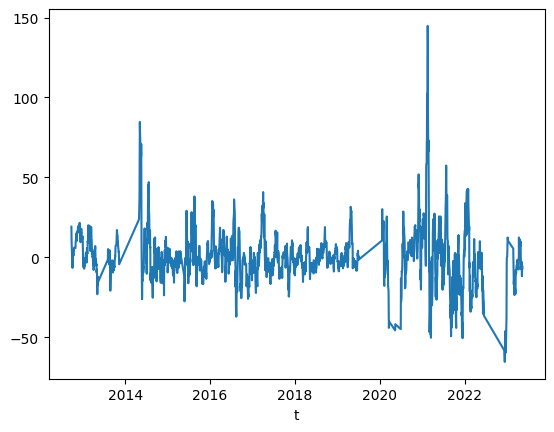

In [14]:
df['Seasonal First Difference'].plot()

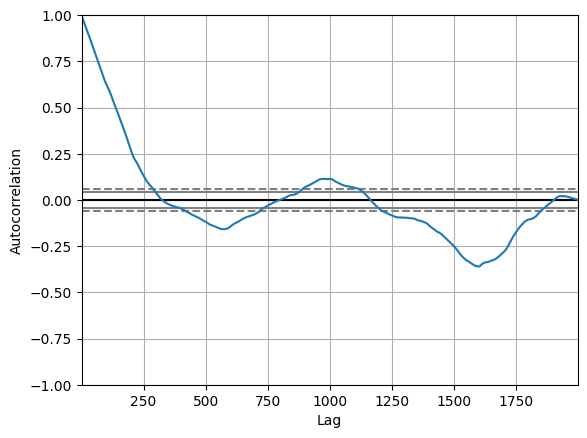

In [15]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['c'])
plt.show()

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

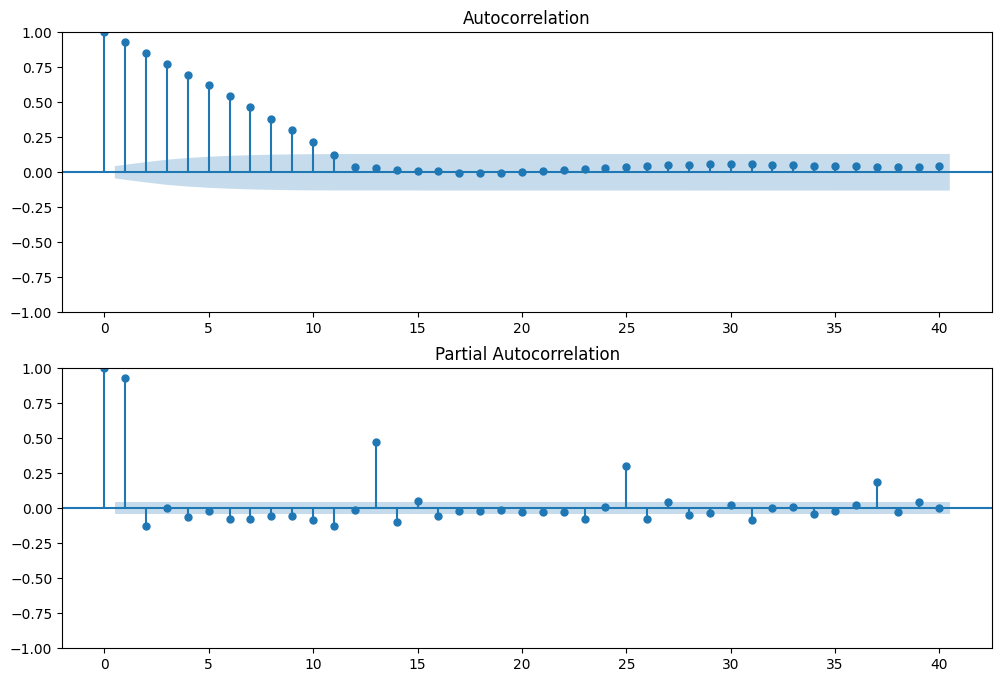

In [34]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [23]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [36]:
model=ARIMA(df['c'],order=(1,1,1))
model_fit=model.fit()

c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [37]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      c   No. Observations:                 1997
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5808.683
Date:                Tue, 13 Jun 2023   AIC                          11623.366
Time:                        00:10:29   BIC                          11640.163
Sample:                             0   HQIC                         11629.534
                               - 1997                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4773      0.081     -5.860      0.000      -0.637      -0.318
ma.L1          0.5867      0.077      7.587      0.000       0.435       0.738
sigma2        19.7343      0.297     66.500      0.000      19.153      20.316
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              4547.61
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.92   Skew:                             1.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
import math
training_data_len = math.ceil(len(df)*0.8)
training_data_len

1598

In [39]:
train = df.iloc[0:training_data_len,:]
test =df.iloc[training_data_len:,:]

In [40]:
start = len(train)
end = len(train)+len(test)-1

<Axes: xlabel='t'>

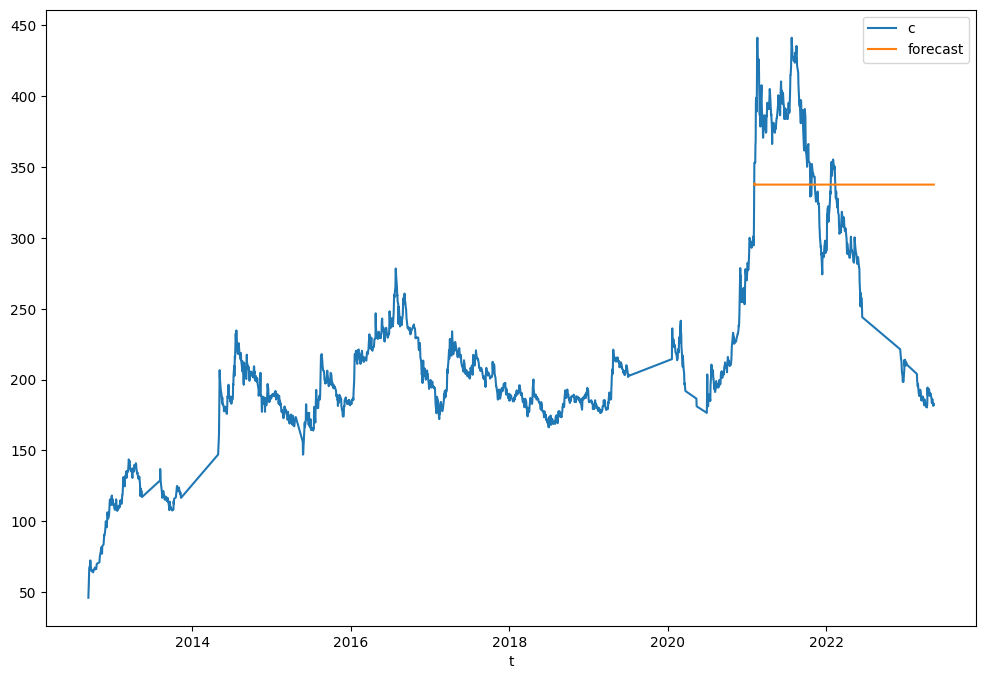

In [41]:
df['forecast']=model_fit.predict(start=start,end=end,dynamic=True)
df[['c','forecast']].plot(figsize=(12,8))

In [42]:
import statsmodels.api as sm

In [44]:
model=sm.tsa.statespace.SARIMAX(df['c'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\97798\Downloads\Stock Vision\Stock prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: xlabel='t'>

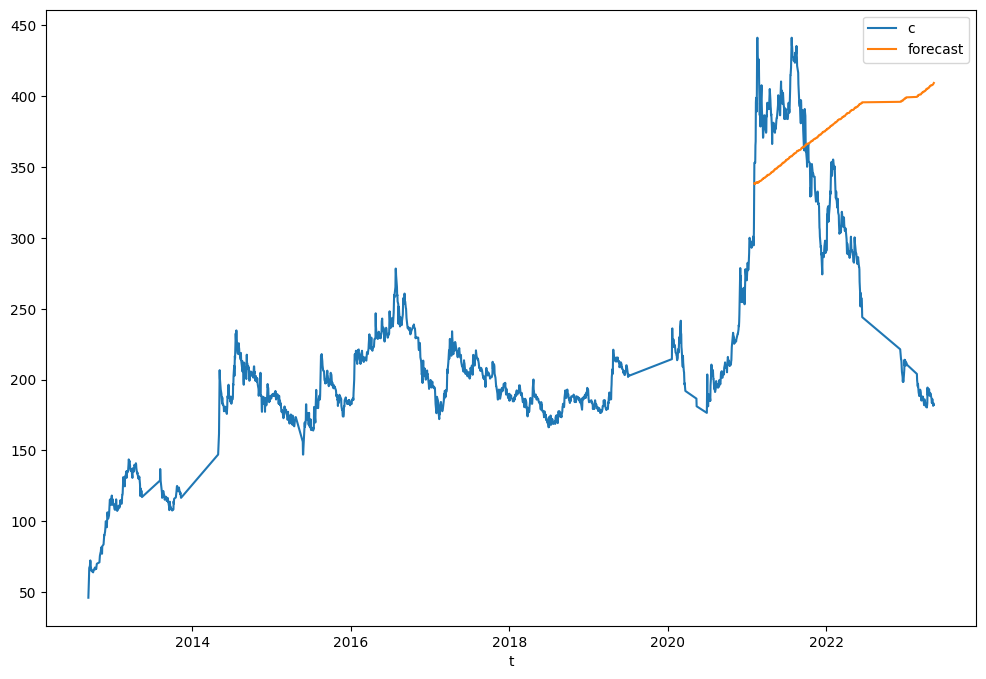

In [45]:
df['forecast']=results.predict(start=start,end=end,dynamic=True)
df[['c','forecast']].plot(figsize=(12,8))